## Base Code: https://www.kaggle.com/piantic/how-to-finetuning-models-pytorch-xla-tpu

In [4]:
!ls

sample_data


In [5]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sapthrishi007","key":"5c8fc318724fea2b1e6b9a3bff31b299"}'}

In [30]:
from google.colab import files
files.upload()

Saving resnet200d_fold0_end.pth to resnet200d_fold0_end (1).pth


KeyboardInterrupt: ignored

In [ ]:
!mkdir -p input/ranzcr-chest-xray-pretrainer
!mv resnet200d_fold0_end\ (1).pth   input/ranzcr-chest-xray-pretrainer/resnet200d_fold0_end.pth
!rm resnet200d_fold0_end.pth

In [6]:
! mkdir ~/.kaggle

In [7]:
! cp kaggle.json ~/.kaggle/

In [8]:
 ! chmod 600 ~/.kaggle/kaggle.json

In [9]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Uninstalling kaggle-1.5.10:
  Successfully uninstalled kaggle-1.5.10
     |████████████████████████████████| 1.5MB 6.3MB/s 
  Found existing installation: pip 19.3.1
    Uninstalling pip-19.3.1:
      Successfully uninstalled pip-19.3.1
     |████████████████████████████████| 58 kB 2.6 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72859 sha256=328be2fd44c8a6d8f91bf0e193971740ab219a6c72024f09f0aa984d7332cbd1
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [11]:
!kaggle competitions download -c ranzcr-clip-catheter-line-classification

100% 11.7G/11.7G [03:08<00:00, 77.3MB/s]
100% 11.7G/11.7G [03:08<00:00, 66.6MB/s]


In [12]:
!mkdir -p input/ranzcr-clip-catheter-line-classification/

In [13]:
!unzip ranzcr-clip-catheter-line-classification.zip -d input/ranzcr-clip-catheter-line-classification/

Streaming output truncated to the last 5000 lines.
  inflating: input/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.80037468194220420320170944397575295227.jpg  
  inflating: input/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.80048407175337306557451404132392019931.jpg  
  inflating: input/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.80058141917130703975834534533058558900.jpg  
  inflating: input/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.80062845141741671052045396402379570613.jpg  
  inflating: input/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.80065354188180228774750311922384866730.jpg  
  inflating: input/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.80065596468977553272320950387981297089.jpg  
  inflating: input/ranzcr-clip-catheter-line-classification/train/1.2.826.0.1.3680043.8.498.80068774453246950728257986408626689

In [15]:
!rm input/ranzcr-clip-catheter-line-classification/*_tfrecords

rm: cannot remove 'input/ranzcr-clip-catheter-line-classification/test_tfrecords': Is a directory
rm: cannot remove 'input/ranzcr-clip-catheter-line-classification/train_tfrecords': Is a directory


In [3]:
!ls input/ranzcr-clip-catheter-line-classification/

sample_submission.csv  test_tfrecords  train_annotations.csv  train_tfrecords
test		       train	       train.csv


In [17]:
version = "20210201"
!pip install timm  > /dev/null
!curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py  > /dev/null
!python pytorch-xla-env-setup.py --version $version  > /dev/null
!pip install pytorch-lightning==1.1.5 > /dev/null
!pip install git+https://github.com/ildoonet/pytorch-gradual-warmup-lr.git > /dev/null

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  5116  100  5116    0     0  64759      0 --:--:-- --:--:-- --:--:-- 64759
Copying gs://tpu-pytorch/wheels/torch-nightly+20210201-cp37-cp37m-linux_x86_64.whl...
| [1 files][123.5 MiB/123.5 MiB]                                                
Operation completed over 1 objects/123.5 MiB.                                    
Copying gs://tpu-pytorch/wheels/torch_xla-nightly+20210201-cp37-cp37m-linux_x86_64.whl...
| [1 files][132.3 MiB/132.3 MiB]                                                
Operation completed over 1 objects/132.3 MiB.                                    
Copying gs://tpu-pytorch/wheels/torchvision-nightly+20210201-cp37-cp37m-linux_x86_64.whl...
/ [1 files][  4.8 MiB/  4.8 MiB]                                                
Operation completed over 1 objects/4.8 MiB.                                      
ERROR:

In [19]:
!pip install albumentations==0.4.6

     |████████████████████████████████| 117 kB 6.5 MB/s 
     |████████████████████████████████| 948 kB 8.7 MB/s 
  Created wheel for albumentations: filename=albumentations-0.4.6-py3-none-any.whl size=65161 sha256=bc19c827cafe5d281ba5b3a6d3690810446324a6681ca05e74edb1f57ff54ff8
  Stored in directory: /root/.cache/pip/wheels/cf/34/0f/cb2a5f93561a181a4bcc84847ad6aaceea8b5a3127469616cc
Successfully built albumentations
  Attempting uninstall: imgaug
    Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9
  Attempting uninstall: albumentations
    Found existing installation: albumentations 0.1.12
    Uninstalling albumentations-0.1.12:
      Successfully uninstalled albumentations-0.1.12


In [20]:
!pip install pytorch-ignite

     |████████████████████████████████| 193 kB 5.4 MB/s 


In [56]:
import os
import gc
import time
import math
import random
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
from   torch.nn import CrossEntropyLoss, MSELoss
from   torch.nn.modules.loss import _WeightedLoss
import torch.nn.functional as F
from   torch.nn import Parameter
from   torch.optim import AdamW
from   torch.utils.data import Dataset, DataLoader

from   warmup_scheduler import GradualWarmupScheduler
from   sklearn import preprocessing
from   sklearn.metrics import accuracy_score
from   sklearn.model_selection import StratifiedKFold, GroupKFold
from   sklearn.metrics import accuracy_score, precision_recall_fscore_support, matthews_corrcoef, roc_auc_score
from   sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score

import timm
import albumentations as A
from   albumentations.pytorch import ToTensorV2
from   albumentations.core.transforms_interface import DualTransform
from   albumentations.augmentations import functional as AF
import cv2

from   tqdm import tqdm
from   pprint import pprint
from   functools import partial
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ("ignore")

In [57]:
class CFG:
    device       = torch.device ('cuda:0' if torch.cuda.is_available () else 'cpu')
    num_workers  = 4
    nprocs       = 8 # [1, 8]
    model_name   = 'resnet200d' # ['deit_base_patch16_224', 'vit_base_patch16_384', 'resnext50_32x4d', 'tf_efficientnet_b7_ns']
    size         = 720  # [64, 128, 224, 384, 512]
    train        = True
    freeze       = False     # this is updated during training   
    freeze_epo   = 0 # GradualWarmupSchedulerV2
    warmup_epo   = 1 # GradualWarmupSchedulerV2
    cosine_epo   = 3 # GradualWarmupSchedulerV2
    epochs       = freeze_epo + warmup_epo + cosine_epo # [GradualWarmupSchedulerV2, n_epochs]
    scheduler    = 'GradualWarmupSchedulerV2'
    epochsNx     = 1    
    criterion    = 'BCEWithLogitsLoss'    # ['CrossEntropyLoss', 'BCEWithLogitsLoss', 'SmoothBCEwithLogits']
    batch_size   = 32  # [10, 32, 64]
    T_0          = 10 # CosineAnnealingWarmRestarts
    lr           = 1e-4
    min_lr       = 1e-6
    weight_decay = 1e-6
    max_grad_norm= 1000
    tta          = 3 
    seed         = 42
    target_size  = -1    # init below
    n_fold       = 5
    train_fold   = [0] #, 1, 2, 3, 4]
    # infer_fold = [0, 1, 2, 3, 4]
    gradient_accumulation_steps = 1
    print_freq   = 100
    img_ext      = '.jpg'
    img_col      = "StudyInstanceUID"
    label_cols   = [
                    'ETT - Abnormal', 'ETT - Borderline', 'ETT - Normal',
                    'NGT - Abnormal', 'NGT - Borderline', 'NGT - Incompletely Imaged', 'NGT - Normal', 
                    'CVC - Abnormal', 'CVC - Borderline', 'CVC - Normal',
                    'Swan Ganz Catheter Present'
    ]
    model_infer_path_prefix = "./input/ranzcr-chest-xray-pretrainer"
    model_train_path_prefix = "."
    train_path   = './input/ranzcr-clip-catheter-line-classification/train'
    train_csv    = './input/ranzcr-clip-catheter-line-classification/train.csv'
    test_path    = './input/ranzcr-clip-catheter-line-classification/test'
    test_csv     = './input/ranzcr-clip-catheter-line-classification/test.csv'
    output_dir   = './'
    
    # smoothing    = 0.1
    # freeze_epo = 1 # after these epochs, gradually unfreeze top layers
    # gradual_unfreez_epo = 7
    # IMG_MEAN     = [0.485, 0.456, 0.406] #Mean for normalization Transform cassava = [0.4303, 0.4967, 0.3134] imgnet = [0.485, 0.456, 0.406]
    # IMG_STD      = [0.229, 0.224, 0.225] #STD for normalization Transform cassava = [0.2142, 0.2191, 0.1954] imgnet = [0.229, 0.224, 0.225]          
    # min_unfreez_layer = 2   # for ViT, allowed to unfreeze layers 11 to 5 only and not less than 5
    
    
CFG.target_size = len (CFG.label_cols)

In [58]:
# os.system ('curl https://raw.githubusercontent.com/pytorch/xla/master/contrib/scripts/env-setup.py -o pytorch-xla-env-setup.py')
# os.system ('python pytorch-xla-env-setup.py --version nightly --apt-packages libomp5 libopenblas-dev')
os.system ('export XLA_USE_BF16=1')
os.system ('export XLA_TENSOR_ALLOCATOR_MAXSIZE=100000000')
import torch_xla.core.xla_model as xm
import torch_xla.distributed.parallel_loader as pl
import torch_xla.distributed.xla_multiprocessing as xmp
#!pip install pytorch-ignite
import ignite.distributed as idist

CFG.device     = torch.device ('cuda' if torch.cuda.is_available () else 'cpu')
CFG.lr         = CFG.lr * CFG.nprocs
CFG.batch_size = CFG.batch_size // CFG.nprocs
timm.__version__

'0.3.4'

In [59]:
OUTPUT_DIR = CFG.output_dir
if not os.path.exists (OUTPUT_DIR):
    os.makedirs (OUTPUT_DIR)

In [60]:
def init_logger (log_file=CFG.output_dir+'train.log'):
    
    from logging import getLogger, INFO, FileHandler,  Formatter,  StreamHandler
    logger = getLogger (__name__)
    logger.setLevel (INFO)
    handler1 = StreamHandler ()
    handler1.setFormatter (Formatter ("%(message)s"))
    handler2 = FileHandler (filename=log_file)
    handler2.setFormatter (Formatter ("%(message)s"))
    logger.addHandler (handler1)
    logger.addHandler (handler2)
    return logger


!touch ./train.log
gc.collect ()
LOGGER = init_logger ()

In [61]:
def seed_everything (seed):
    
    random.seed (seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed (seed)
    torch.manual_seed (seed)
    torch.cuda.manual_seed (seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True
    return

seed_everything (CFG.seed)

# Augmentation Dataset

In [62]:
# NOTE: We don't normalize here since it all gets dark
# if advprop:           # for models using advprop pretrained weights
#     normalize = transforms.Lambda(lambda img: img * 2.0 - 1.0)
# else:
#     normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    
train_transforms = A.Compose ([
        A.HorizontalFlip (p=0.5),
        A.Resize (CFG.size, CFG.size),
        ToTensorV2 (p=1.0),
])
valid_transforms = A.Compose ([
        A.Resize (CFG.size, CFG.size),
        ToTensorV2 (p=1.0),
])

def get_transforms (data='train'):
    
    if 'train' in data:
        return train_transforms
    elif 'valid' in data:
        return valid_transforms
    else:
        return valid_transforms

In [63]:
class ImgDataset (Dataset):
    
    def __init__(self, df, img_file_colname=CFG.img_col, label_cols=CFG.label_cols, 
                 transform=get_transforms(), img_dir=CFG.train_path, img_ext=CFG.img_ext):
        
        super ().__init__()
        self.df               = df.reset_index (drop=True)
        self.img_ext          = CFG.img_ext
        self.img_dir          = img_dir
        self.label_cols       = label_cols
        self.img_file_colname = img_file_colname
        self.transform        = transform
        return
    
    def __len__(self):
        return self.df.shape[0]        # TODO: fix this
    
    def __getitem__(self, idx):
        
        file_name = self.df[self.img_file_colname][idx].replace (self.img_ext, '') + self.img_ext
        file_path = f'{self.img_dir}/{file_name}'
        image     = cv2.imread (file_path)
        image     = cv2.cvtColor (image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image = self.transform (image=image)['image'].float ()
        else:
            image = ToTensorV2 ()(image = image)["image"].float ()
        
        if len (self.label_cols) > 0:
            label = torch.tensor (self.df.loc[idx, self.label_cols]).float () # long ()
            return image, label
        return image

In [64]:
def getFolds ():
    
    train_folds_df = pd.read_csv (CFG.train_csv)
    label = train_folds_df[CFG.label_cols]
    if len (CFG.label_cols) > 1:
        label = train_folds_df[CFG.label_cols[0]]
    
    skf = StratifiedKFold (n_splits=CFG.n_fold, shuffle=True, random_state=CFG.seed)
    for n, (train_index, val_index) in enumerate (skf.split (train_folds_df, label)):
        train_folds_df.loc[val_index, 'fold'] = int (n)
    train_folds_df['fold'] = train_folds_df['fold'].astype (int)
    # print (train_folds_df.groupby (['fold', label]).size ())
    
    return train_folds_df

torch.Size([3, 720, 720])
torch.Size([3, 720, 720])
torch.Size([3, 720, 720])
torch.Size([3, 720, 720])
torch.Size([3, 720, 720])
torch.Size([3, 720, 720])
torch.Size([3, 720, 720])
torch.Size([3, 720, 720])
torch.Size([3, 720, 720])
torch.Size([3, 720, 720])


27

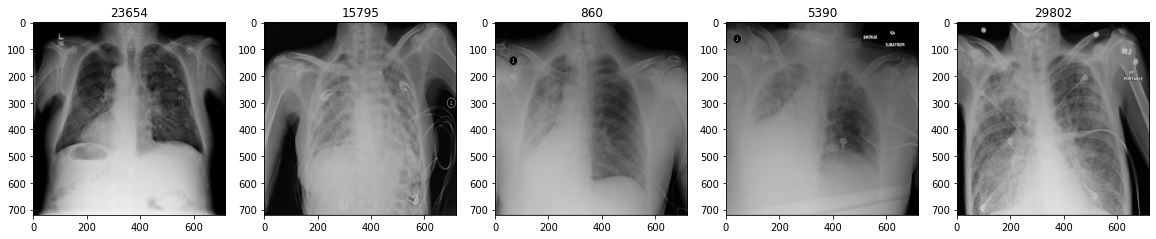

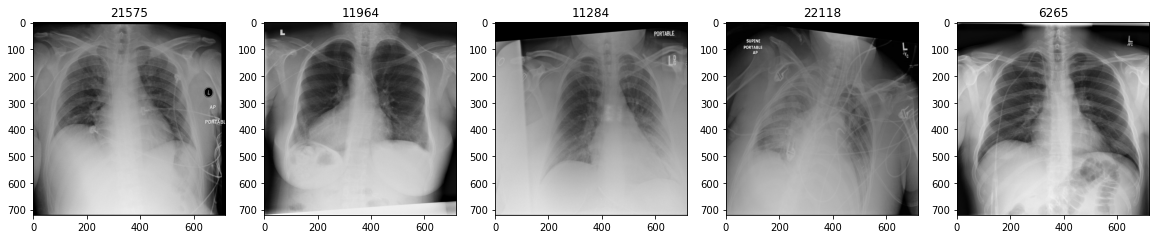

In [65]:
def plot_imgs (dataset_show):
    
    from pylab import rcParams
    rcParams['figure.figsize'] = 20,10
    for i in range (2):
        f, axarr = plt.subplots (1,5)
        for p in range (5):
            idx = np.random.randint (0, len (dataset_show))
            img, label = dataset_show[idx]                                    ;print (img.size())
            img = img.byte ()
            axarr[p].imshow (img.permute(1, 2, 0))
            axarr[p].set_title (idx)
    return

TR_DATASET = ImgDataset (getFolds ())
plot_imgs (TR_DATASET)
del TR_DATASET
gc.collect ()

## Scheduler

In [66]:
class GradualWarmupSchedulerV2 (GradualWarmupScheduler):
    
    def __init__(self, optimizer, multiplier, total_epoch, after_scheduler=None):
        super (GradualWarmupSchedulerV2, self).__init__(optimizer, multiplier, total_epoch, after_scheduler)
    
    def get_lr (self):
        if self.last_epoch > self.total_epoch:
            if self.after_scheduler:
                if not self.finished:
                    self.after_scheduler.base_lrs = [base_lr * self.multiplier for base_lr in self.base_lrs]
                    self.finished = True
                return self.after_scheduler.get_lr()
            return [base_lr * self.multiplier for base_lr in self.base_lrs]
        if self.multiplier == 1.0:
            return [base_lr * (float(self.last_epoch) / self.total_epoch) for base_lr in self.base_lrs]
        else:
            return [base_lr * ((self.multiplier - 1.) * self.last_epoch / self.total_epoch + 1.) for base_lr in self.base_lrs]

In [67]:
def get_scheduler (optimizer):
    
        if CFG.scheduler=='ReduceLROnPlateau':
            scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=CFG.factor, patience=CFG.patience, verbose=True, eps=CFG.eps)
        elif CFG.scheduler=='CosineAnnealingLR':
            scheduler = CosineAnnealingLR(optimizer, T_max=CFG.T_max, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='CosineAnnealingWarmRestarts':
            scheduler = CosineAnnealingWarmRestarts(optimizer, T_0=CFG.T_0, T_mult=1, eta_min=CFG.min_lr, last_epoch=-1)
        elif CFG.scheduler=='GradualWarmupSchedulerV2':
            scheduler_cosine=torch.optim.lr_scheduler.CosineAnnealingWarmRestarts(optimizer, CFG.cosine_epo)
            scheduler_warmup=GradualWarmupSchedulerV2(optimizer, multiplier=10, total_epoch=CFG.warmup_epo, after_scheduler=scheduler_cosine)
            scheduler=scheduler_warmup
        return scheduler

> # Loss Functions

In [68]:
# this works for only 1 label, not multi-label target.
class SmoothBCEwLogits (_WeightedLoss):
    
    def __init__(self, weight=None, reduction='mean', smoothing=0.0):
        super().__init__(weight=weight, reduction=reduction)
        self.smoothing = smoothing
        self.weight = weight
        self.reduction = reduction

    @staticmethod
    def _smooth(targets:torch.Tensor, n_labels:int, smoothing=0.0):
        assert 0 <= smoothing < 1
        with torch.no_grad():
            targets = targets * (1.0 - smoothing) + 0.5 * smoothing
        return targets

    def forward(self, inputs, targets):
        targets = SmoothBCEwLogits._smooth(targets, inputs.size(-1),
            self.smoothing)
        loss = F.binary_cross_entropy_with_logits(inputs, targets,self.weight)

        if  self.reduction == 'sum':
            loss = loss.sum()
        elif  self.reduction == 'mean':
            loss = loss.mean()

        return loss

In [69]:
def get_criterion (class_wt):
    
    if CFG.criterion=='CrossEntropyLoss':
        criterion = LabelSmoothingCrossEntropy ()
    elif CFG.criterion=='SmoothBCEwithLogits':
        criterion = SmoothBCEwLogits (smoothing=CFG.smoothing)
    elif CFG.criterion=='BCEWithLogitsLoss':
        criterion =  nn.BCEWithLogitsLoss (pos_weight=class_wt)
    return criterion

In [70]:
# ====================================================
# MODEL
# ====================================================
class CustomResNet(nn.Module):
    def __init__(self, model_name=CFG.model_name, pretrained=False):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        n_features = self.model.fc.in_features
        self.model.fc = nn.Linear (n_features, CFG.target_size)
        return
    
    def forward(self, x):
        x = self.model (x)
        return x
    
    def freeze (self):
        # To freeze the residual layers
        for param in self.model.parameters():
            param.requires_grad = False

        for param in self.model.fc.parameters():
            param.requires_grad = True
        return
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.model.parameters():
            param.requires_grad = True
        return
    
class CustomResNext(nn.Module):
    def __init__(self, model_name=CFG.model_name, pretrained=False):
        super().__init__()
        self.model = timm.create_model(model_name, pretrained=pretrained)
        n_features = self.model.fc.in_features
        self.model.fc = nn.Linear(n_features, CFG.target_size)

    def forward(self, x):
        x = self.model(x)
        return x
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.model.parameters():
            param.requires_grad = False

        for param in self.model.fc.parameters():
            param.requires_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.model.parameters():
            param.requires_grad = True
            

class CustomEfficientNet(nn.Module):
    def __init__(self, model_name=CFG.model_name, pretrained=False):
        super().__init__()
        self.model = timm.create_model (CFG.model_name, pretrained=pretrained)
        n_features = self.model.classifier.in_features
        self.model.classifier = nn.Linear(n_features, CFG.target_size)

    def forward(self, x):
        x = self.model(x)
        return x
        
    def freeze(self):
        # To freeze the residual layers
        for param in self.model.parameters():
            param.requires_grad = False

        for param in self.model.classifier.parameters():
            param.requires_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.model.parameters():
            param.requires_grad = True
    
    
class CustomDeiT(nn.Module):
    def __init__(self, model_name=CFG.model_name, pretrained=False):
        super().__init__()
        self.model = torch.hub.load('facebookresearch/deit:main', model_name, pretrained=pretrained)
        n_features = self.model.head.in_features
        self.model.head = nn.Linear(n_features, CFG.target_size)

    def forward(self, x):
        x = self.model(x)
        return x
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.model.parameters():
            param.requires_grad = False

        for param in self.model.head.parameters():
            param.requires_grad = True
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.model.parameters():
            param.requires_grad = True

    
class CustomViT(nn.Module):
    
    def __init__(self, model_name=CFG.model_name, pretrained=False):
                 # min_unfreez_layer=CFG.min_unfreez_layer, max_layer_no=CFG.max_layer_no):
        
        super().__init__()
        self.model      = timm.create_model(model_name, pretrained=pretrained)
        n_features      = self.model.head.in_features
        self.model.head = nn.Linear(n_features, CFG.target_size)
        self.min_unfreez_layer = min_unfreez_layer
        self.max_layer_no      = max_layer_no
        return

    def forward(self, x):
        x = self.model(x)
        return x
    
    def freeze(self):
        # To freeze the residual layers
        for param in self.model.parameters():
            param.requires_grad = False

        for param in self.model.head.parameters():
            param.requires_grad = True
        return
    
    def unfreeze(self):
        # Unfreeze all layers
        for param in self.model.parameters():
            param.requires_grad = True
        return
    
    # def unfreeze_layer (self, layer_no=11):
    #     # unfreeze a particular layer
    #     if layer_no >= self.min_unfreez_layer and layer_no <= self.max_layer_no:
    #         for param in self.model.blocks[layer_no].parameters ():
    #             param.requires_grad = False
    #     return

In [71]:
def load_state (model_path, model):
    
    state_dict = None
    try:  # single GPU model_file
        model.load_state_dict (torch.load (model_path, map_location=torch.device ('cpu')), strict=True)
        state_dict = torch.load (model_path)['model']
    except:  # multi GPU model_file
        state_dict = torch.load (model_path, map_location=torch.device ('cpu'))
        state_dict = {k[7:] if k.startswith ('module.') else k: state_dict[k] for k in state_dict.keys ()}
        model.load_state_dict (state_dict)
    return state_dict

In [72]:
def getModel (fold, isTrain=True):
    
    model = None
    if 'deit_' in CFG.model_name:
        model = CustomDeiT (model_name=CFG.model_name, pretrained=isTrain)
    elif 'vit_' in CFG.model_name:
        model = CustomViT (model_name=CFG.model_name, pretrained=isTrain)
    elif 'resnext' in CFG.model_name:
        model = CustomResNext (CFG.model_name, pretrained=isTrain)
    elif 'resnet' in CFG.model_name:
        model = CustomResNet (CFG.model_name, pretrained=isTrain)
    elif 'efficientnet' in CFG.model_name:
        model = CustomEfficientNet (CFG.model_name, pretrained=isTrain)  
    if isTrain:
        
        # TODO: pass
        model_path = f'{CFG.model_infer_path_prefix}/{CFG.model_name}_fold{fold}_end.pth'
        if os.path.exists (model_path):
            load_state (model_path, model)
            torch.save (model.state_dict (), f'{CFG.model_train_path_prefix}/{CFG.model_name}_fold{fold}.pth')
    else:
        
        # TODO: change CFG.model_train_path_prefix to CFG.model_infer_path_prefix
        model_path = f'{CFG.model_train_path_prefix}/{CFG.model_name}_fold{fold}_maxacc.pt'
        load_state (model_path, model)
        
    if CFG.freeze:        
        model.freeze ()
    else:
        model.unfreeze ()
    return model

In [73]:
def compute_metrics (labels, pred_pr):
    
    preds   = pred_pr.argmax (-1)             #;print ('labels.shape=', labels.shape, 'preds.shape=', preds.shape, 'pred_logits.shape=', pred_logits.shape)
    precision, recall, f1, _ = precision_recall_fscore_support (labels, preds, average='macro')
    acc     = accuracy_score (labels, preds)
    mcc     = matthews_corrcoef (labels, preds)   # matthews correlation coefficient
    # auc   = roc_auc_score (labels, pred_pr[:, 1])
    metrics = {
        'mcc'      : mcc,
        'accuracy' : acc,
        'f1'       : f1,
        'precision': precision,
        'recall'   : recall,
        # 'auc'    : auc
    }
    return metrics

def compute_multiclass_metrics (labels, pred_pr):
    """
    pred_pr => batchSize * n_class
    labels  => (batchSize * n_class)
    """
    
    metrics = []
    n_class = labels.shape[1]
    for i in range (n_class):
        
        label  = labels[:, i]
        prob1  = pred_pr[:, i]
        prob0  = 1 - prob1
        pred_p = np.hstack ((prob0.reshape ((-1, 1)), prob1.reshape ((-1, 1))))
        scores = compute_metrics (label, pred_p)
        metrics.append (scores)
        
    # Now Avg over each classes
    metrics_df = pd.DataFrame (metrics)  
    metrics_df = metrics_df.mean ()
    return metrics_df #.to_dict ()

In [74]:
# Helper functions
class AverageMeter (object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count


def asMinutes(s):
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)


def timeSince(since, percent):
    now = time.time()
    s = now - since
    es = s / (percent)
    rs = es - s
    return '%s (remain %s)' % (asMinutes(s), asMinutes(rs))

In [75]:
def train_fn (train_loader, model, criterion, optimizer, epoch, scheduler, device=CFG.device):
    
    batch_time = AverageMeter ()
    data_time  = AverageMeter ()
    losses     = AverageMeter ()
    scores     = AverageMeter ()
    # switch to train mode
    model.train ()
    start = end = time.time ()
    global_step = 0
    for step, (images, labels) in enumerate (train_loader):
        
        # measure data loading time
        data_time.update (time.time () - end)
        images = images.to (device)
        labels = labels.to (device)
        batch_size = labels.size (0)
        
        y_preds = model (images)        
        loss    = criterion (y_preds, labels)
        # record loss
        losses.update (loss.item (), batch_size)
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        loss.backward ()
        grad_norm = torch.nn.utils.clip_grad_norm_ (model.parameters (), CFG.max_grad_norm)
        if (step + 1) % CFG.gradient_accumulation_steps == 0:
            
            xm.optimizer_step (optimizer, barrier=True)
            optimizer.zero_grad ()
            global_step += 1
        # measure elapsed time
        batch_time.update (time.time () - end)
        end = time.time ()
        if step % CFG.print_freq == 0 or step == (len (train_loader)-1):
            
            xm.master_print (
                'Epoch: [{0}][{1}/{2}] '
                'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                'Elapsed {remain:s} '
                'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                'Grad: {grad_norm:.4f}  '
                #'LR: {lr:.6f}  '
                .format (
                    epoch+1, step, len(train_loader), batch_time=batch_time,
                    data_time=data_time, loss=losses,
                    remain=timeSince(start, float(step+1)/len(train_loader)),
                    grad_norm=grad_norm,
                    #lr=scheduler.get_lr()[0],
                )
            )
    return losses.avg

In [76]:
def get_score (labels, pred_pr):
    
    return compute_multiclass_metrics (labels, pred_pr)

In [77]:
def valid_fn (valid_loader, model, criterion, device):
    batch_time = AverageMeter ()
    data_time  = AverageMeter ()
    losses     = AverageMeter ()
    scores     = AverageMeter ()
    # switch to evaluation mode
    model.eval ()
    trues = []
    preds = []
    start = end = time.time ()
    for step, (images, labels) in enumerate (valid_loader):
        # measure data loading time
        data_time.update (time.time () - end)
        images = images.to (device)
        labels = labels.to (device)
        batch_size = labels.size (0)
        # compute loss
        with torch.no_grad ():
            y_preds = model (images)
        loss = criterion (y_preds, labels)
        losses.update (loss.item (), batch_size)
        # record accuracy
        trues.append (labels.to ('cpu').numpy ())
        preds.append (y_preds.softmax (1).to ('cpu').numpy ())
        if CFG.gradient_accumulation_steps > 1:
            loss = loss / CFG.gradient_accumulation_steps
        # measure elapsed time
        batch_time.update (time.time () - end)
        end = time.time ()        
        
        if step % CFG.print_freq == 0 or step == (len (valid_loader)-1):
            xm.master_print('EVAL: [{0}/{1}] '
                            'Data {data_time.val:.3f} ({data_time.avg:.3f}) '
                            'Elapsed {remain:s} '
                            'Loss: {loss.val:.4f}({loss.avg:.4f}) '
                            .format(
                            step, len(valid_loader), batch_time=batch_time,
                            data_time=data_time, loss=losses,
                            remain=timeSince(start, float(step+1)/len(valid_loader)),
                            ))
    trues = np.concatenate (trues)
    predictions = np.concatenate (preds)
    return losses.avg, predictions, trues

In [78]:
def train_fold_loop (fold, train_df=getFolds ()):

    LOGGER.info(f"========== fold: {fold} training ==========")

    # ====================================================
    # loader
    # ====================================================
    trn_idx = train_df[train_df['fold'] != fold].index
    val_idx = train_df[train_df['fold'] == fold].index
    train_folds_df = train_df.loc[trn_idx].reset_index (drop=True)
    valid_folds_df = train_df.loc[val_idx].reset_index (drop=True) 
    class_wt       = train_df[CFG.label_cols].sum (axis=0)
    class_wt       = torch.tensor (np.sum (np.array (class_wt.values)) / np.array (class_wt.values)) #;print ('class_wt =', class_wt)
    del train_df; gc.collect ()
    
    criterion      = get_criterion (class_wt=class_wt)
    train_dataset  = ImgDataset (train_folds_df, transform=get_transforms ('train'))
    valid_dataset  = ImgDataset (valid_folds_df, transform=get_transforms ('valid'))
    train_datlder  = DataLoader (train_dataset, batch_size=CFG.batch_size, shuffle=True,  num_workers=CFG.num_workers, pin_memory=True, drop_last=True)
    valid_datlder  = DataLoader (valid_dataset, batch_size=CFG.batch_size, shuffle=False, num_workers=CFG.num_workers, pin_memory=True, drop_last=False)
    # dls          = DataLoaders (train_datlder, valid_datlder, device=CFG.device)
    device         = xm.xla_device ()
    xm.set_rng_state (CFG.seed, device)
    model          = getModel (fold, isTrain=True)
    model          = model.float().to (device)
    modelfile      = f'{CFG.model_train_path_prefix}/{CFG.model_name}_fold{fold}'
    optimizer      = AdamW (filter(lambda p: p.requires_grad, model.parameters ()), lr=CFG.lr, weight_decay=CFG.weight_decay, amsgrad=False)
    scheduler      = get_scheduler (optimizer)    
    LOGGER.info (f'Criterion: {criterion}')
    
    best_score = 0.
    score_df   = None
    best_loss  = np.inf    
    for epoch in range (CFG.epochs):
        
        start_time = time.time()
        
        # train
        if CFG.nprocs == 1:
            avg_loss = train_fn (train_datlder, model, criterion, optimizer, epoch, scheduler, device)
        elif CFG.nprocs == 8:
            para_train_loader = pl.ParallelLoader (train_datlder, [device])
            avg_loss = train_fn (para_train_loader.per_device_loader (device), model, criterion, optimizer, epoch, scheduler, device)
                
        # eval
        if CFG.nprocs == 1:
            avg_val_loss, preds, _ = valid_fn (valid_datlder, model, criterion, device)
        elif CFG.nprocs == 8:
            para_valid_loader = pl.ParallelLoader (valid_datlder, [device])
            avg_val_loss, preds, valid_labels = valid_fn (para_valid_loader.per_device_loader(device), model, criterion, device)
            preds = torch.sigmoid (idist.all_gather (torch.tensor (preds))).to ('cpu').numpy ()
            valid_labels = idist.all_gather (torch.tensor (valid_labels)).to ('cpu').numpy()
        scheduler.step (epoch)
        
        # scoring
        valid_score_df = compute_multiclass_metrics (valid_labels, preds) # get_score (valid_labels, preds.argmax (1))
        elapsed        = time.time () - start_time        
        if CFG.nprocs == 1:
            
            LOGGER.info (f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
            LOGGER.info (f'{valid_score_df}')
        elif CFG.nprocs == 8:
            
            xm.master_print (f'Epoch {epoch+1} - avg_train_loss: {avg_loss:.4f}  avg_val_loss: {avg_val_loss:.4f}  time: {elapsed:.0f}s')
            xm.master_print (f'{valid_score_df}')  
            xm.master_print (f"{valid_score_df['accuracy']}")
        if valid_score_df['accuracy'] > best_score:
            
            best_score = valid_score_df['accuracy']
            if CFG.nprocs == 1:
                LOGGER.info (f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
            elif CFG.nprocs == 8:
                xm.master_print (f'Epoch {epoch+1} - Save Best Score: {best_score:.4f} Model')
            xm.save ({'model': model, 'preds': preds}, OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth')
        xm.save ({'model': model, 'preds': preds}, OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_end.pth')
        
    # if CFG.nprocs != 8:
    #     check_point = torch.load (OUTPUT_DIR+f'{CFG.model_name}_fold{fold}_best_score.pth')
    #     valid_folds['preds'] = check_point['preds']
    
    return valid_score_df.to_numpy ().reshape ((1, -1))

In [79]:
def train_main ():
    
    if CFG.train:
        
        valid_scores = []
        for fold in range (CFG.n_fold):
            if fold in CFG.train_fold:
                valid_scores_fold = train_fold_loop (fold)
                valid_scores_fold = np.array (valid_scores_fold).reshape ((1, -1))
                valid_scores.append (valid_scores_fold)      
        
        valid_scores = np.vstack (valid_scores)
        valid_scores = np.mean (valid_scores, axis=0)
        xm.master_print (f"CV Scores = {valid_scores}")

In [ ]:
rishi
# model_names = timm.list_models (pretrained=True)
# model_names = timm.list_models ('resnet', pretrained=True)
# pprint (model_names)

def _mp_fn (rank, flags):

  torch.set_default_tensor_type ('torch.FloatTensor')
  # xm.set_rng_state()
  a = train_main ()
  return

FLAGS = {} 
xmp.spawn (_mp_fn, args=(FLAGS,), nprocs=CFG.nprocs, start_method='fork')

========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
========== fold: 0 training ==========
Criterion: BCEWithLogitsLoss()
Criterion: BCEWithLogitsLoss()
Cr

Epoch: [1][0/6016] Data 6.466 (6.466) Elapsed 2m 33s (remain 15402m 32s) Loss: 1.0998(1.0998) Grad: 4.0373  
Epoch: [1][100/6016] Data 0.295 (0.864) Elapsed 12m 19s (remain 722m 16s) Loss: 0.8333(1.9649) Grad: 0.5357  
Epoch: [1][200/6016] Data 0.871 (0.820) Elapsed 20m 16s (remain 586m 30s) Loss: 0.8925(2.0186) Grad: 0.9108  
Epoch: [1][300/6016] Data 0.542 (0.816) Elapsed 28m 13s (remain 535m 55s) Loss: 1.0780(2.0360) Grad: 1.2278  


In [ ]:
fold = 0
modelFile = OUTPUT_DIR + f'{CFG.model_name}_fold{fold}_end.pth')
files.download (modelFile)

# Inference

In [ ]:
def compute_metrics (labels, preds):
    
    # preds   = pred_pr.argmax (-1)             # ;print ('labels.shape=', labels.shape, 'preds.shape=', preds.shape, 'pred_logits.shape=', pred_logits.shape)
    precision, recall, f1, _ = precision_recall_fscore_support (labels, preds, average='macro')
    acc     = accuracy_score (labels, preds)
    mcc     = matthews_corrcoef (labels, preds)   # matthews correlation coefficient
    # softmax = nn.Softmax (dim=1)
    # pred_pr = softmax (torch.tensor (pred_logits))
    # auc     = roc_auc_score (labels, pred_pr[:, 1])
    metrics = {
        'mcc'      : mcc,
        'accuracy' : acc,
        'f1'       : f1,
        'precision': precision,
        'recall'   : recall,
        #'auc'     : auc
    }
    return metrics

In [ ]:
def inference_one_loop (model, data_loader, device):
    model.eval ()
    image_preds_all = []
    pbar = tqdm (enumerate (data_loader), total=len (data_loader))
    for step, (imgs) in pbar:
        imgs = imgs.to (device).float ()
        image_preds = None
        with torch.no_grad():
            image_preds = torch.sigmoid (model (imgs)).detach ().cpu ().numpy ()
        image_preds_all += [image_preds]
    
    image_preds_all = np.concatenate (image_preds_all, axis=0)
    return image_preds_all

In [ ]:
def infer ():
    
    # CFG.freeze = True
    tst_preds_avg = []    
    seed_everything (CFG.seed)
    test_df = pd.DataFrame ()
    test_df[CFG.img_col] = list (os.listdir (CFG.test_path))
    test_ds = ImgDataset (test_df, label_cols=[], transform=get_transforms('valid'), img_dir=CFG.test_path)
    print ('len (test_ds) =', len (test_ds)) 
    print ('test_ds[10].shape =', test_ds[10].shape)
    
    tst_loader = DataLoader (
        test_ds, 
        batch_size=CFG.batch_size,
        num_workers=CFG.num_workers,
        shuffle=False,
        pin_memory=False,
    )                                            #;print ('len (tst_loader)=', len (tst_loader))
    for fold in CFG.train_fold:
        
        print ('Inference fold {} started'.format (fold))
        model     = getModel (fold, isTrain=False).to (CFG.device)
        tst_preds = None        
        with torch.no_grad ():
            for _ in range (CFG.tta):
                if tst_preds is None:
                    tst_preds = [1/CFG.tta * inference_one_loop (model, tst_loader, CFG.device)]
                else:
                    tst_preds += [1/CFG.tta * inference_one_loop (model, tst_loader, CFG.device)]
        
        # tst_preds = tst_preds.reshape ((-1, len (CFG.label_cols)))
        if tst_preds_avg is None:
            tst_preds_avg = tst_preds / len (CFG.train_fold)
        else:
            tst_preds_avg += tst_preds / len (CFG.train_fold)
        del model
        torch.cuda.empty_cache ()
        gc.collect ()
    
    # test_df['label'] = np.argmax (tst_preds_avg, axis=-1)  # for softmax
    test_df['label'] = (tst_preds_avg >= 0.5) + 0   # for sigmoid
    print (test_df.head ())
    test_df.to_csv ('submission.csv', index=False)

In [ ]:
infer ()

In [ ]:
print ('Done !')